In [1]:
# Seleccionar un conjunto de datos de algún repositorio público o de alguna fuente propia.
import requests
url="https://raw.githubusercontent.com/crozasc/t2/main/forbes_2022_billionaires.csv"
target_csv_path="forbes_2022_billionaires.csv"

response= requests.get(url)

response.raise_for_status()
with open(target_csv_path,"wb") as f:
    f.write(response.content)
print("CSV descargado correctamente")

CSV descargado correctamente


In [60]:
# Cargar los datos desde la fuente en su respectivo formato a un dataframe.
import pandas as pd

# Utilizar los métodos pandas.read_xxx() y pandas.to_xxx() para leer y guardar los datos.
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [29]:
# Revisar si los datos de entrada tienen o no un encabezado. De no ser así, corregir esta situación.
aux = df.columns.tolist()
header = ["rank","personName","age","finalWorth","year","month","category","source","country","state","city","countryOfCitizenship","organization","selfMade","gender","birthDate","title","philanthropyScore","residenceMsa","numberOfSiblings","bio","about"]
if aux!=header:
    df.loc[-1] = aux
    df.index = df.index + 1  
    df = df.sort_index()  
    df.columns = header
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [15]:
# Realizar un análisis básico de los datos de entrada con con los métodos .describe() y .info().
df.describe()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
count,2668,2668,2582.0,2668.0,2668,2668,2668,2668,2655,748,...,352,2668,2652,2569,401,396.0,640,128.0,2668,1562
unique,228,2666,77.0,228.0,2,2,18,914,73,42,...,316,3,2,2044,94,6.0,110,11.0,2668,1548
top,1929,Li Li,59.0,1500.0,2022,4,Finance & Investments,real estate,United States,California,...,Meta Platforms,True,M,1965-01-01,Entrepreneur,1.0,"New York, NY",2.0,Elon Musk is working to revolutionize transpor...,"The family's Knauf Museum, on the premises of ..."
freq,147,2,82.0,147.0,2667,2667,392,151,748,186,...,4,1890,2341,19,73,175.0,119,44.0,1,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rank                  2668 non-null   object
 1   personName            2668 non-null   object
 2   age                   2582 non-null   object
 3   finalWorth            2668 non-null   object
 4   year                  2668 non-null   object
 5   month                 2668 non-null   object
 6   category              2668 non-null   object
 7   source                2668 non-null   object
 8   country               2655 non-null   object
 9   state                 748 non-null    object
 10  city                  2624 non-null   object
 11  countryOfCitizenship  2668 non-null   object
 12  organization          352 non-null    object
 13  selfMade              2668 non-null   object
 14  gender                2652 non-null   object
 15  birthDate             2569 non-null   

In [30]:
# Identificar y manipular valores faltantes.
import numpy as np
#a) Identificar valores faltantes.
datos_faltantes = df.isnull()
for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("")    

columna: rank
False    2668
Name: rank, dtype: int64

columna: personName
False    2668
Name: personName, dtype: int64

columna: age
False    2582
True       86
Name: age, dtype: int64

columna: finalWorth
False    2668
Name: finalWorth, dtype: int64

columna: year
False    2668
Name: year, dtype: int64

columna: month
False    2668
Name: month, dtype: int64

columna: category
False    2668
Name: category, dtype: int64

columna: source
False    2668
Name: source, dtype: int64

columna: country
False    2655
True       13
Name: country, dtype: int64

columna: organization
True     2316
False     352
Name: organization, dtype: int64

columna: selfMade
False    2668
Name: selfMade, dtype: int64

columna: gender
False    2652
True       16
Name: gender, dtype: int64

columna: title
True     2267
False     401
Name: title, dtype: int64

columna: numberOfSiblings
True     2541
False     127
Name: numberOfSiblings, dtype: int64

columna: bio
False    2668
Name: bio, dtype: int64



In [61]:
#Manipular valores faltantes.
#Borramos columnas con información que consideramos poco relevante
df.pop("state")
df.pop("city")
df.pop("countryOfCitizenship")
df.pop("birthDate")
df.pop("philanthropyScore")
df.pop("residenceMsa")
df.pop("about")
df.pop("year")
df.pop("month")
df.pop("numberOfSiblings")
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,numberOfSiblings,bio
0,1,Elon Musk,50.0,219000.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,NaN,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58.0,171000.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,NaN,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,NaN,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66.0,129000.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,NaN,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett..."


In [62]:
#Quitar espacios en Value para usar como int
#En la edad ponemos un promedio a aquellas personas que no sabemos su edad
prom_Value = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, prom_Value, inplace = True)


In [50]:
df.dtypes

rank                  int64
personName           object
age                 float64
finalWorth          float64
year                  int64
month                 int64
category             object
source               object
country              object
organization         object
selfMade               bool
gender               object
title                object
numberOfSiblings    float64
bio                  object
dtype: object

In [64]:
# Corregir el formato de los datos.
df[["age"]] = df[["age"]].astype("int")
df.dtypes

rank                  int64
personName           object
age                   int32
finalWorth          float64
category             object
source               object
country              object
organization         object
selfMade               bool
gender               object
title                object
numberOfSiblings      int32
bio                  object
dtype: object

In [65]:
#Estandarizar datos de entrada.
#Dolar a clp
df['finalWorth'] = df["finalWorth"]*853.51
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,numberOfSiblings,bio
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,0,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,0,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,0,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,0,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,0,"Known as the ""Oracle of Omaha,"" Warren Buffett..."


In [ ]:
# Normalizar datos de entrada.

Text(0.5, 1.0, 'Dinero por persona')

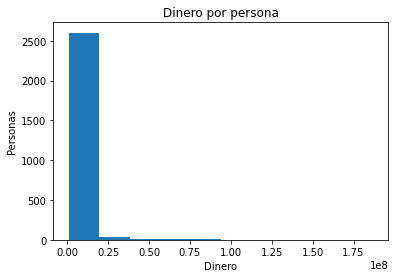

In [66]:
# Agrupar datos de entrada.
%matplotlib inline
import matplotlib as plt
plt.pyplot.hist(df["finalWorth"])
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Dinero")
plt.pyplot.ylabel("Personas")
plt.pyplot.title("Dinero por persona")


Text(0.5, 1.0, 'Dinero por persona')

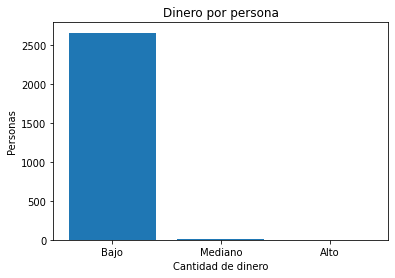

In [69]:
contenedores = np.linspace(min(df["finalWorth"]), max(df["finalWorth"]), 4)
nombres_de_grupo = ['Menor cantidad  de dinero', 'Cantidad promedio de dinero', 'Mayor cantidad de  dinero']
df['Value-binned'] = pd.cut(df['finalWorth'], contenedores, labels=nombres_de_grupo, include_lowest=True )

plt.pyplot.bar(nombres_de_grupo, df["Value-binned"].value_counts())
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Cantidad de dinero")
plt.pyplot.ylabel("Personas")
plt.pyplot.title("Dinero por persona")

In [70]:
df.head()

,rank,personName,age,finalWorth,category,source,country,organization,selfMade,gender,title,numberOfSiblings,bio,Value-binned
0,1,Elon Musk,50,186918690.0,Automotive,"Tesla, SpaceX",United States,Tesla,True,M,CEO,0,Elon Musk is working to revolutionize transpor...,Alto
1,2,Jeff Bezos,58,145950210.0,Technology,Amazon,United States,Amazon,True,M,Entrepreneur,0,Jeff Bezos founded e-commerce giant Amazon in ...,Alto
2,3,Bernard Arnault & family,73,134854580.0,Fashion & Retail,LVMH,France,LVMH Moët Hennessy Louis Vuitton,False,M,Chairman and CEO,0,Bernard Arnault oversees the LVMH empire of so...,Alto
3,4,Bill Gates,66,110102790.0,Technology,Microsoft,United States,Bill & Melinda Gates Foundation,True,M,Cofounder,0,Bill Gates turned his fortune from software fi...,Mediano
4,5,Warren Buffett,91,100714180.0,Finance & Investments,Berkshire Hathaway,United States,Berkshire Hathaway,True,M,CEO,0,"Known as the ""Oracle of Omaha,"" Warren Buffett...",Mediano


In [72]:
#  Generar variables indicadoras.
variable_dummy_1 = pd.get_dummies(df["gender"])
variable_dummy_1.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [14]:
variable_dummy_1.rename(columns={'M':'Male', 'F':'Female'}, inplace=True)
# combinar los dataframes "df" y "variable_dummy_1" 
df = pd.concat([df, variable_dummy_1], axis=1)

# Elimina la columna original "fuel-type" del dataframe "df"
df.pop("gender")
df.head()

,TIME,GEO,ICD10,Value,Value-binned,Only females,Only males
0,2001,France,All causes of death (A00-Y89) excluding S00-T98,277858,Alto,0,1
1,2001,France,Certain infectious and parasitic diseases (A00...,5347,Bajo,0,1
2,2001,France,Tuberculosis,545,Bajo,0,1
3,2001,France,Meningococcal infection,30,Bajo,0,1
4,2001,France,Viral hepatitis,471,Bajo,0,1


In [15]:
# Guardar el conjunto de datos procesado.
df.to_csv('New.csv')